<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409562 entries, 0 to 409561
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    409562 non-null  object 
 1   continent                                   389975 non-null  object 
 2   location                                    409562 non-null  object 
 3   date                                        409562 non-null  object 
 4   total_cases                                 370544 non-null  float64
 5   new_cases                                   398301 non-null  float64
 6   new_cases_smoothed                          397071 non-null  float64
 7   total_deaths                                347781 non-null  float64
 8   new_deaths                                  398701 non-null  float64
 9   new_deaths_smoothed                         397471 non-null  float64
 

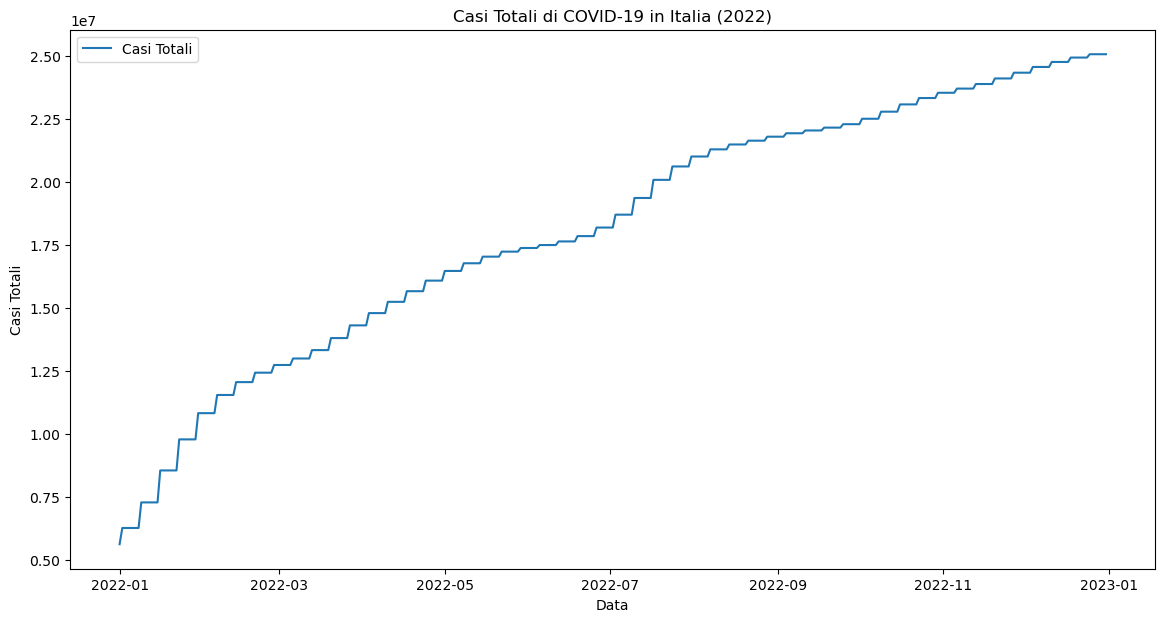

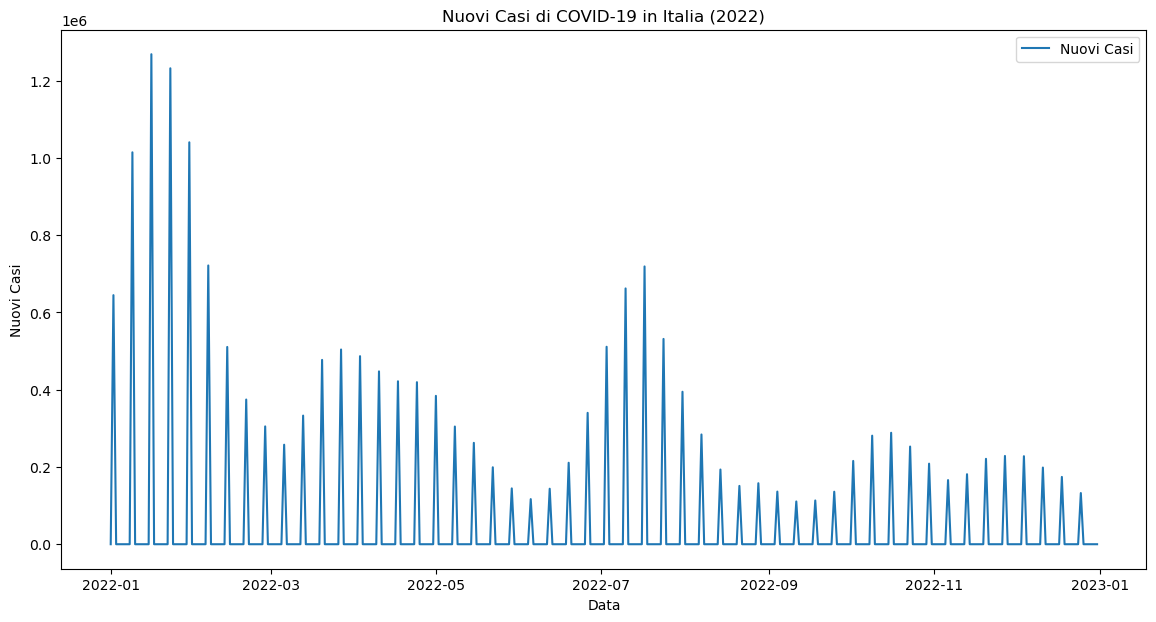

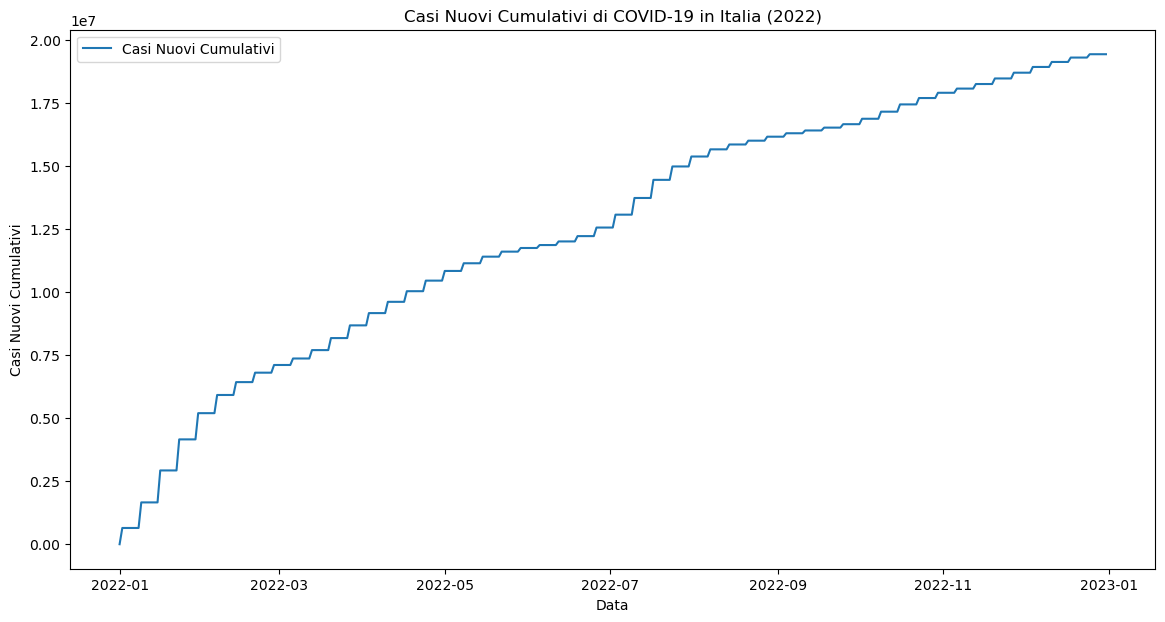

<Figure size 1400x700 with 0 Axes>

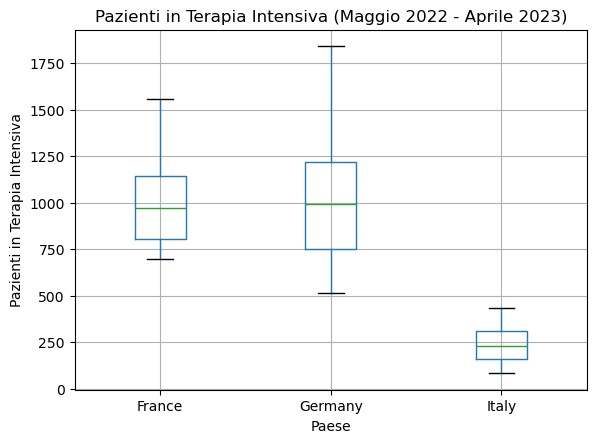

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il dataset
file_path = "C://Users//mporc//Documents//Python Scripts//owid-covid-data.csv"
covid_data = pd.read_csv(file_path)

# Informazioni di base e dimensioni
print(covid_data.info())
print(covid_data.shape)

# Casi totali per ogni continente
continent_cases = covid_data.groupby('continent')['total_cases'].sum().dropna()
print(continent_cases)

# Funzione per confrontare due continenti
def compare_continents(continent1, continent2):
    total_world_cases = covid_data['total_cases'].sum()
    stats = {}
    for continent in [continent1, continent2]:
        continent_data = covid_data[covid_data['continent'] == continent]['total_cases']
        max_cases = continent_data.max()
        mean_cases = continent_data.mean()
        percentage_cases = (continent_data.sum() / total_world_cases) * 100
        stats[continent] = {'max': max_cases, 'mean': mean_cases, 'percentage': percentage_cases}
    return stats

# Esempio di confronto
continent1 = 'Asia'
continent2 = 'Europa'
comparison = compare_continents(continent1, continent2)
print(comparison)

# Analisi Italia 2022
italy_2022 = covid_data[(covid_data['location'] == 'Italy') & (covid_data['date'].str.contains('2022'))].copy()
italy_2022['date'] = pd.to_datetime(italy_2022['date'])

plt.figure(figsize=(14, 7))
plt.plot(italy_2022['date'], italy_2022['total_cases'], label='Casi Totali')
plt.title('Casi Totali di COVID-19 in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(italy_2022['date'], italy_2022['new_cases'], label='Nuovi Casi')
plt.title('Nuovi Casi di COVID-19 in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.legend()
plt.show()

italy_2022['cumulative_new_cases'] = italy_2022['new_cases'].cumsum()
plt.figure(figsize=(14, 7))
plt.plot(italy_2022['date'], italy_2022['cumulative_new_cases'], label='Casi Nuovi Cumulativi')
plt.title('Casi Nuovi Cumulativi di COVID-19 in Italia (2022)')
plt.xlabel('Data')
plt.ylabel('Casi Nuovi Cumulativi')
plt.legend()
plt.show()

# Confronto pazienti in terapia intensiva
icu_data = covid_data[(covid_data['location'].isin(['Italy', 'Germany', 'France'])) & 
                     (covid_data['date'] >= '2022-05-01') & (covid_data['date'] <= '2023-04-30')]

plt.figure(figsize=(14, 7))
icu_data.boxplot(column='icu_patients', by='location')
plt.title('Pazienti in Terapia Intensiva (Maggio 2022 - Aprile 2023)')
plt.suptitle('')
plt.xlabel('Paese')
plt.ylabel('Pazienti in Terapia Intensiva')
plt.show()

# Pazienti ospedalizzati nel 2023
hospitalized_data = covid_data[(covid_data['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & 
                               (covid_data['date'].str.contains('2023'))]

hospitalized_summary = hospitalized_data.groupby('location')['hosp_patients'].sum().fillna(0)
print(hospitalized_summary)